# Class Activity 2 [20 minutes]:<br>$\require{cancel}\cancel{\color{gray}{\scriptsize \text{Beta-Binomial}}}$*Binomial-Discrete (prior)*

For **Bernoulli data** $n_1 = 1$ and $x_1 = 0$ and **prior** 

$$\scriptsize p(\theta=p) = \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}$$

1. $\text{What is }p\left(\theta=\frac{i}{100} | x\right)\text{ for }i = 0,1,\cdots,100?$

2. Keep going... what is the sequence of **priors** for the observations $0,0,1,0,1,1,0,0,0\;$ up to the final **binomial data** of $n = 9$ and $x_9 = 3$ ?

3. Bonus: is **sequential** or **batch** updating more computationally efficient?


# Class Activity 2: Batch Solution [15 minutes]


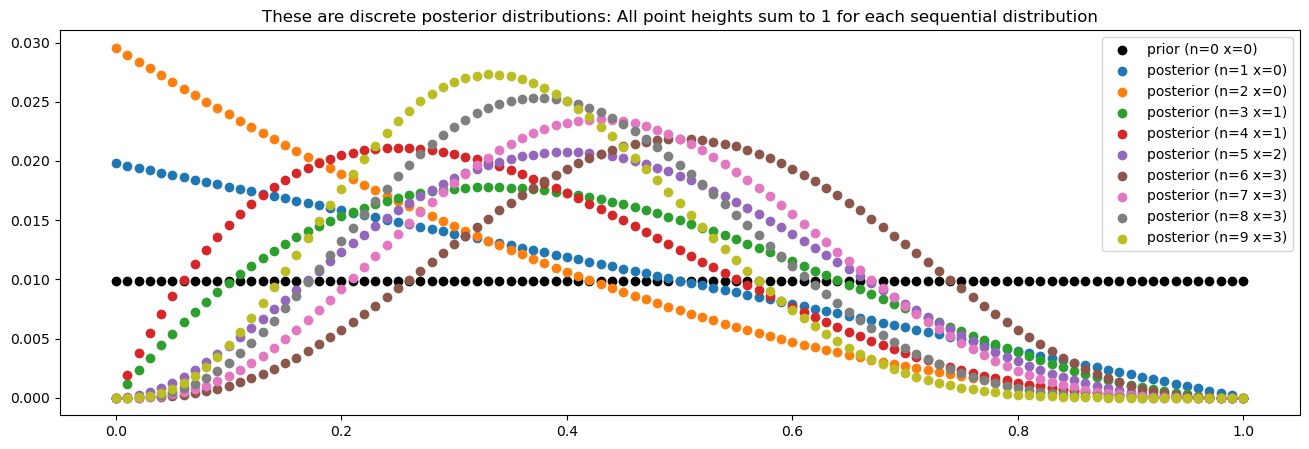

In [1]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
observations = 0,0,1,0,1,1,0,0,0; parameter_domain = np.linspace(0,1,101) # parameter_domain*1+1/n
n,x,prior = 0,0,np.ones(101)/101; plt.figure(figsize=(16,5))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
for observation in observations:
    n += 1; x += observation; likelihood = stats.binom.pmf(n=n, k=x, p=parameter_domain)
    joint = likelihood*prior # elementwise multiplication
    normalized_joint = joint/joint.sum()
    plt.scatter(parameter_domain, normalized_joint, label="posterior (n="+str(n)+" x="+str(x)+")")
plt.legend(); plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution");

# Class Activity 2: Sequential Solution [10 minutes]

<font size="5"> 

> Authored by Leo Watson

```python
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
# Sequential Learning <-- Using initial prior and data, want to update posterior.
# Then, keep doing this recursively with posterior of previous iteration becoming
# prior of new iteration
# Assumptions:
#   Assuming data comes from a Bernoulli distribution.
data = [0, 0, 1, 0, 1, 1, 0, 0, 0] # n = 9, x (num "successes") = 3
n = 0 # num datapoints so far
s = 0 # num successes so far
xk = np.arange(101) / 101
pk = (1/101,) * 101
parameter_domain = np.linspace(0,1,101)
initial_prior = stats.rv_discrete(name='initial_prior', values=(xk, pk))
current_prior = initial_prior.pmf(xk)
plt.figure(figsize=(10,4))
#plt.legend(loc='best')
# pdf for discrete uniform
for l in data:
  n+= 1; s += l
  liklihood = stats.bernoulli.pmf(k = l, p = parameter_domain)
  # normalizing constant
  joint = current_prior * liklihood # Note that joint is simply product of likelihoods b/c indep.
  updated_posterior = liklihood * current_prior / joint.sum()
  current_prior = updated_posterior # new_prior_is_now_last_posterior = stats.rv_discrete(name='new_prior', values=(xk, updated_posterior))
  plt.scatter(parameter_domain, current_prior, label="posterior (n="+str(n)+" x="+str(x)+")")
plt.legend()
```
                          
</font>

### The results and figures of by the Sequential and Batch methods match

# Class Activity 2: Bonus Timing [5 minutes]

<font size="5">

- Authored by Leo Watson -- Note: "Timing implementation isn't perfect; approx" -- Leo 

</font>

<font size="2">

> "I think the runtime is quite a bit slower for batch though. I believe sequential is O(n) as each observation is only considered once when updating the posterior, while batch is O(n^2) because for n observations, use first observation in batch update n times, second n-1 times, and so forth => (1+2+ .. + n) = n(n+1)/2. I empirically found batch to be significantly slower than sequential for 10000 iterations in my code as well (approx 50% slower), which was a good sanity check." -- Leo 

</font>

    
<font size="4"> 
    
<table>

<tr>
<th>
Batch  
</th>
<th>    
Sequential    
</th>
</tr>
    
<tr>
<td>

```python
import time
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

sum_time = 0
iter = 10000
for m in range(iter):
    observations = [0,0,0,1,0,1,1,0,0]; parameter_domain = np.linspace(0,1,101)
    if m == 0:
      plt.figure(figsize=(10,4))
    xk = np.arange(101) / 101
    pk = (1/101,) * 101
    parameter_domain = np.linspace(0,1,101)
    custm = stats.rv_discrete(name='custm', values=(xk, pk))
    prior = custm.pmf(xk)
    n,x = 0,0
    st = time.time()
    for observation in observations:
        #print("Current prior:", prior)
        n += 1; x += observation
        likelihood = stats.binom.pmf(n=n, k=x, p=parameter_domain)
        joint = likelihood*prior # elementwise multiplication
        normalized_joint = joint/joint.sum()
        if m == 0:
            plt.scatter(parameter_domain, normalized_joint, label="posterior (n="+str(n)+" x="+str(x)+")")
            plt.legend()
    et = time.time()
    elapsed_time = et - st
    sum_time += elapsed_time
print(sum_time)
```

</td>
<td>
    

```python
# Sequential Learning <-- Using initial prior and data, want to update posterior.
# Then, keep doing this recursively with posterior of previous iteration becoming
# prior of new iteration
# Assumptions:
sum_time = 0
iter = 10000
for m in range(iter):
    #   Assuming data comes from a binomial.
    data = [0,0, 0, 1, 0, 1, 1, 0, 0] # n = 9, x (num "successes") = 3
    n = 0 # num datapoints so far
    s = 0 # num successes so far
    xk = np.arange(101) / 101
    pk = (1/101,) * 101
    parameter_domain = np.linspace(0,1,101)
    custm = stats.rv_discrete(name='custm', values=(xk, pk))
    initial_prior = custm.pmf(xk)
    if m == 0:
      plt.figure(figsize=(10,4))
    #plt.legend(loc='best')
    # pdf for discrete uniform

    st = time.time()
    for l in data:
      n+= 1; s += l
      liklihood = stats.bernoulli.pmf(k = l, p = parameter_domain)
      # normalizing constant
      joint = initial_prior * liklihood # Note that joint is simply product of marginals b/c indep.
      initial_prior = liklihood * initial_prior / joint.sum()
      if m == 0:
            plt.scatter(parameter_domain, initial_prior, label="posterior (n="+str(n)+" x="+str(x)+")")
            plt.legend()
    et = time.time()
    elapsed_time = et - st
    sum_time += elapsed_time
print(sum_time)
```

</td>
</tr>
    
    
<tr>
<td>
21.090922117233276
</td>
<td>    
14.840104579925537    
</td>
</tr>
    
</table>


</font>

# The first (toy) model: beta-binomial [3 minutes]

\begin{align*}
p(x|\theta,n) &={} \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \quad\quad\;\;\; [n \text{ given}]\\
p(\theta|\alpha,\beta) &={} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \quad \begin{array}{l}\text{$\alpha$ and $\beta$ are called}\\ \textbf{hyperparameters}\end{array}\\\\
\color{white}{p(\theta|x)} &\color{white}{={} ?}\\
\color{white}{\text{Hint: } p(\theta|x)} &\color{white}{\propto{} p(\theta,x)}\\
&{} \color{white}{p(x|\theta)p(\theta)}\\\\
&{} \color{white}{\left( \begin{array}{c}n\\k\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}}\\
&\color{white}{\propto{}  \theta^{x}(1-\theta)^{n-x} \theta^{\alpha-1}(1-\theta)^{\beta-1}}\\
&{}  \color{white}{\theta^{x+\alpha-1}(1-\theta)^{n-x+\beta-1} \Rightarrow \text{What distribution?}}
\end{align*}

# The first (toy) model: beta-binomial [2 minutes]

\begin{align*}
p(x|\theta,n) &={} \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \quad\quad\;\;\; [n \text{ given}]\\
p(\theta|\alpha,\beta) &={} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \quad \begin{array}{l}\text{$\alpha$ and $\beta$ are called}\\ \textbf{hyperparameters}\end{array}\\\\
p(\theta|x) &={} ?\\
\text{Hint: } p(\theta|x) &\propto{} p(\theta,x)\\\\
&{} \color{white}{p(x|\theta)p(\theta)}\\
&{} \color{white}{\left( \begin{array}{c}n\\k\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}}\\
&\color{white}{\propto{}  \theta^{x}(1-\theta)^{n-x} \theta^{\alpha-1}(1-\theta)^{\beta-1}}\\
&{}  \color{white}{\theta^{x+\alpha-1}(1-\theta)^{n-x+\beta-1} \Rightarrow \text{What distribution?}}
\end{align*}

# The first (toy) model: beta-binomial [4 minutes]

\begin{align*}
p(x|\theta,n) &={} \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \quad\quad\;\;\; [n \text{ given}]\\
p(\theta|\alpha,\beta) &={} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \quad \begin{array}{l}\text{$\alpha$ and $\beta$ are called}\\ \textbf{hyperparameters}\end{array}\\\\
p(\theta|x) &={} ?\\
\text{Hint: } p(\theta|x) &\propto{} p(\theta,x)\\\\
&={} p(x|\theta)p(\theta)\\
&={} \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}\\
&\propto{}  \theta^{x}(1-\theta)^{n-x} \theta^{\alpha-1}(1-\theta)^{\beta-1}\\
&={}  \theta^{x+\alpha-1}(1-\theta)^{n-x+\beta-1} \Rightarrow \text{What distribution?}
\end{align*}

# The second (toy) model: binomial-discrete<br>[3 minutes] 

\begin{align*}
p(x|\theta) &={} \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \quad\quad\;\;\; [n \text{ given}]\\
p(\theta=p) &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \overset{\text{ for } i = 0,1,\cdots,100}{\text{for }p=\frac{i}{101}}\\ 0 & \text{otherwise} \end{array} \quad \begin{array}{l}\text{The 'uniform' choice is}\\ \textbf{the 'hyperparameter'}\end{array}\\\\
\color{white}{p(\theta|x)} &\color{white}{={} ?}\\
\color{white}{\text{Hint: } p(\theta|x)} &\color{white}{\propto{} p(\theta,x) = p(x|\theta)p(\theta)}\\\\
& \color{white}{={} \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\sum_{i=0}^{100}1_{i/101}(\theta)}{101} \begin{array}{c}\leftarrow \text{indicator functions}\\\quad\,\text{are $1$ if $\theta=i/101$}\end{array}}\\
&\color{white}{\propto{} \frac{\left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\sum_{i=0}^{100}1_{i/101}(\theta)}{101}}{ \sum_{\theta \in \{i/101:1,2,\cdots,100\}}  \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\sum_{i=0}^{100}1_{i/101}(\theta)}{101}}}
&\color{white}{\Rightarrow{} \text{What distribution?}}\end{align*}

# The second (toy) model: binomial-discrete<br>[3 minutes] 

\begin{align*}
p(x|\theta) &={} \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \quad\quad\;\;\; [n \text{ given}]\\
p(\theta=p) &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \overset{\text{ for } i = 0,1,\cdots,100}{\text{for }p=\frac{i}{101}}\\ 0 & \text{otherwise} \end{array} \quad \begin{array}{l}\text{The 'uniform' choice is}\\ \textbf{the 'hyperparameter'}\end{array}\\\\
p(\theta|x) &={} ?\\
\text{Hint: } p(\theta|x) &\propto{} p(\theta,x) = p(x|\theta)p(\theta)\\\\
& \color{white}{={} \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\sum_{i=0}^{100}1_{i/101}(\theta)}{101} \begin{array}{c}\leftarrow \text{indicator functions}\\\quad\,\text{are $1$ if $\theta=i/101$}\end{array}}\\
&\color{white}{\propto{} \frac{\left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\sum_{i=0}^{100}1_{i/101}(\theta)}{101}}{ \sum_{\theta \in \{i/101:1,2,\cdots,100\}}  \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\sum_{i=0}^{100}1_{i/101}(\theta)}{101}}}
&\color{white}{\Rightarrow{} \text{What distribution?}}
\end{align*}

# The second (toy) model: binomial-discrete<br>[5 minutes] 

\begin{align*}
p(x|\theta) &={} \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \quad\quad\;\;\; [n \text{ given}]\\
p(\theta=p) &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \overset{\text{ for } i = 0,1,\cdots,100}{\text{for }p=\frac{i}{100}}\\ 0 & \text{otherwise} \end{array} \quad \begin{array}{l}\text{The 'uniform' choice is}\\ \textbf{the 'hyperparameter'}\end{array}\\\\
p(\theta|x) &={} ?\\
\text{Hint: } p(\theta|x) &\propto{} p(\theta,x) = p(x|\theta)p(\theta)\\\\
&={} \color{black}{\left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\sum_{i=0}^{100}1_{i/100}(\theta)}{101} \begin{array}{c}\leftarrow \text{indicator functions}\\\quad\,\text{are $1$ if $\theta=i/100$}\end{array}}\\
&\propto{} \frac{\left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\sum_{i=0}^{100}1_{i/100}(\theta)}{101}}{ \sum_{\theta \in \{i/100:1,2,\cdots,100\}}  \left( \begin{array}{c}n\\x\end{array}\right) \theta^{x}(1-\theta)^{n-x} \frac{\sum_{i=0}^{100}1_{i/100}(\theta)}{101}}
&\color{black}{\Rightarrow{} \text{What distribution?}}
\end{align*}

# A third (toy) model: normal-normal [10 minutes]

---

$$\small
\begin{align*}
p(x|\theta,\phi=\sigma^{-2}) &={} \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}} \quad [\textbf{precision }\phi=\sigma^{-2}\text{ given}]\\
p(\theta|\theta_0,\tau) &={} \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \quad \begin{array}{l}\text{$\theta_0$ and the }\textbf{precision }\text{$\tau$ are}\\\text{called } \textbf{hyperparameters}\end{array}\\\\
\color{white}{p(\theta|x)} &\color{white}{={} ?}\\
\color{white}{\text{Hint: } p(\theta|x)} &\color{white}{\propto{} p(\theta,x) = p(x|\theta)p(\theta)}\\\\
&{} \color{white}{ \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}}} \\
&\color{white}\propto{} \color{white}{\exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] }\\
&\color{white}{\propto}{}  
\color{white}{\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)}\\
&\color{white}{\Rightarrow{} \; \text{What distribution?}}\\{}
\end{align*}$$


# A third (toy) model: normal-normal [2 minutes]

---

$$\small
\begin{align*}
p(x|\theta,\phi=\sigma^{-2}) &={} \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}} \quad [\textbf{precision }\phi=\sigma^{-2}\text{ given}]\\
p(\theta|\theta_0,\tau) &={} \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \quad \begin{array}{l}\text{$\theta_0$ and the }\textbf{precision }\text{$\tau$ are}\\\text{called } \textbf{hyperparameters}\end{array}\\\\
p(\theta|x) &={} ?\\
\text{Hint: } p(\theta|x) &\propto{} p(\theta,x) = p(x|\theta)p(\theta)\\\\
&{} \color{white}{ \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}}} \\
&\color{white}\propto{} \color{white}{\exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] }\\
&\color{white}{\propto}{}  
\color{white}{\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)}\\
&\color{white}{\Rightarrow{} \; \text{What distribution?}}\\{}
\end{align*}$$


# A third (toy) model: normal-normal [3 minutes]

---

$$\small
\begin{align*}
p(x|\theta,\phi=\sigma^{-2}) &={} \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}} \quad [\textbf{precision }\phi=\sigma^{-2}\text{ given}]\\
p(\theta|\theta_0,\tau) &={} \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \quad \begin{array}{l}\text{$\theta_0$ and the }\textbf{precision }\text{$\tau$ are}\\\text{called } \textbf{hyperparameters}\end{array}\\\\
p(\theta|x) &={} ?\\
\text{Hint: } p(\theta|x) &\propto{} p(\theta,x) = p(x|\theta)p(\theta)\\\\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \\
&\propto{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\color{white}{\propto}{}  
\color{white}{\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)}
\end{align*}$$


# A third (toy) model: normal-normal [2 minutes]
---

$$\small
\begin{align*}
p(x|\theta,\phi=\sigma^{-2}) &={} \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}} \quad [\textbf{precision }\phi=\sigma^{-2}\text{ given}]\\
p(\theta|\theta_0,\tau) &={} \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \quad \begin{array}{l}\text{$\theta_0$ and the }\textbf{precision }\text{$\tau$ are}\\\text{called } \textbf{hyperparameters}\end{array}\\\\
p(\theta|x) &={} ?\\
\text{Hint: } p(\theta|x) &\propto{} p(\theta,x) = p(x|\theta)p(\theta)\\\\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \\
 &\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

<br><br><br>


# A third (toy) model: normal-normal [3 minutes]
---

$$\small
\begin{align*}
p(x|\theta,\phi=\sigma^{-2}) &={} \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}} \quad [\textbf{precision }\phi=\sigma^{-2}\text{ given}]\\
p(\theta|\theta_0,\tau) &={} \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \quad \begin{array}{l}\text{$\theta_0$ and the }\textbf{precision }\text{$\tau$ are}\\\text{called } \textbf{hyperparameters}\end{array}\\\\
p(\theta|x) &={} ?\\
\text{Hint: } p(\theta|x) &\propto{} p(\theta,x) = p(x|\theta)p(\theta)\\\\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \\
\overset{\text{What distribution}}{\text{is this?} \longrightarrow} &\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

<br><br><br>


# Homework #2 Part I: <br>Prove that as a function of $\theta$...

---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

### Hint 1: expand the squares, and rebuild the quadratic in terms of $\theta$...
### Hint 2: anything that's not $\theta$ is a constant... and you can drop or multiply by any constants you want to complete the square...


# The "Classic Bayes" Figure [15 minutes]

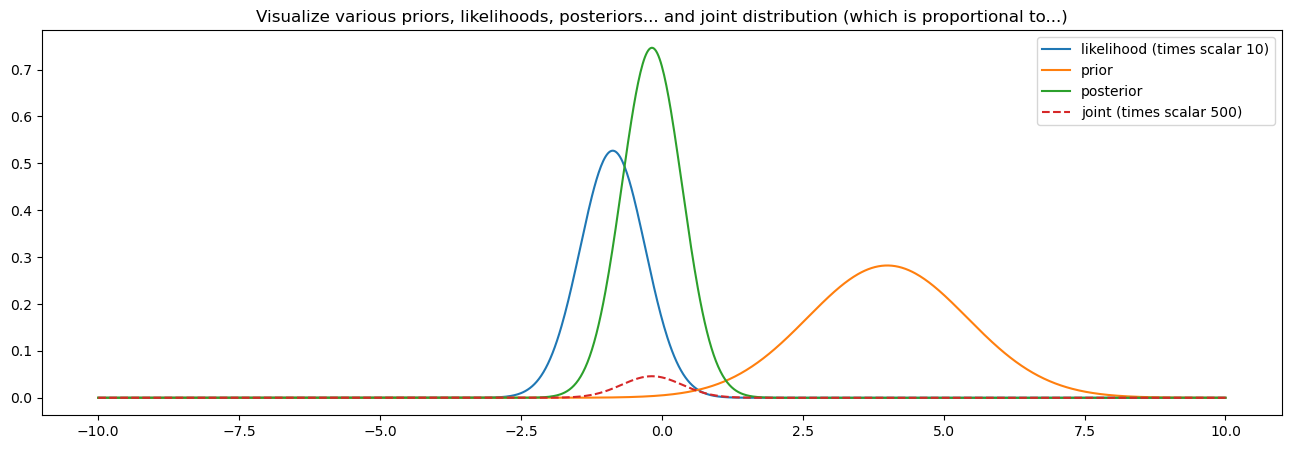

In [2]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5)); plt.plot(parameter_domain, c2*likelihood, label="likelihood (times scalar "+str(c2)+")"); plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior"); plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")"); plt.legend(); plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)"); 

# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. What's the difference between a ***log likelihood*** and ***log posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***log of the marginal likelihood constant***. [Or, another way to start thinking about this is to instead as the question: What's the difference between a ***likelihood*** and ***posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***marginal likelihood constant***.]

<!-- posterior proporitional to joint... --> 


# Types of Priors [2 minutes]

- **Conjugate Prior**
    - The **posterior** parametric family same as **prior** 
    - **Beta-binomial** and **normal-normal** specifications are examples of this

- <font style="color:white;">**Flat Prior** $p(\theta) \propto 1$</font>
 
    - <font style="color:white;">A $\text{Beta}(\alpha=1,\beta=1)$ **prior** for the **beta-binomial** model is a **flat prior**</font>

- <font style="color:white;">**Improper Prior**</font> 

    - <font style="color:white;">**Improper priors** don't integrate to 1 or guanatee **proper posteriors**</font>
    - <font style="color:white;">A $p(\mu) \propto 1$ **prior** for a **normal likelihood** is an **improper prior** but it does in fact produce a **proper normal posterior** in this specific case</font>


# Types of Priors [2 minutes]

- **Conjugate Prior**
    - The **posterior** parametric family same as **prior** 
    - **Beta-binomial** and **normal-normal** specifications are examples of this

- **Flat Prior** $p(\theta) \propto 1$
 
    - A $\text{Beta}(\alpha=1,\beta=1)$ **prior** for the **beta-binomial** model is a **flat prior**

- <font style="color:white;">**Improper Prior**</font> 

    - <font style="color:white;">**Improper priors** don't integrate to 1 or guanatee **proper posteriors**</font>
    - <font style="color:white;">A $p(\mu) \propto 1$ **prior** for a **normal likelihood** is an **improper prior** but it does in fact produce a **proper normal posterior** in this specific case</font>


# Types of Priors [3 minutes]

- **Conjugate Prior**
    - The **posterior** parametric family same as **prior** 
    - **Beta-binomial** and **normal-normal** specifications are examples of this

- **Flat Prior** $p(\theta) \propto 1$
 
    - A $\text{Beta}(\alpha=1,\beta=1)$ **prior** for the **beta-binomial** model is a **flat prior**

- **Improper Prior** 

    - **Improper priors** don't integrate to 1 or guanatee **proper posteriors**
    - A $p(\mu) \propto 1$ **prior** for a **normal likelihood** is an **improper prior** but it does in fact produce a **proper normal posterior** in this specific case


# Types of Priors [8 minutes]

- **Weakly Informative** and **Informative priors**

    - For the **beta-binomial** this depends on the relative sizes of $x,n,\alpha,\beta$
        
      $$\scriptsize\begin{align*}
p(\theta|x,n,\alpha,\beta) &={} \text{Beta}(x+\alpha,n-x+\beta)\\
&\propto{} \theta^{x+\alpha-1}(1-\theta)^{n-x+\beta-1}
\end{align*}$$
  
    - For **normal-normal** it depends on the relative values of  $\phi,n,\sigma$ / $x,\theta$
        
      $$\tiny\begin{align*}
& \quad\quad \underbrace{\;\,\textbf{mean}\,\;}\quad\underbrace{\textbf{precision}}\\
p(\theta|x,\theta_0,\tau, \phi) &={} \text{N}\left(\frac{\left(\tau \theta_0+\phi\sum _{i=1}^{n}x_{i}\right)}{(\tau+n\phi)}, \tau+n\phi \right)\\
&\propto{} \exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$





# Types of Priors [3 minutes]

- **Diffuse priors**

    - A $p(\theta) = \text{Beta}(\alpha=\epsilon_1,\beta=\epsilon_2)$ **prior** specification with <br>very small $\epsilon_1$ and $\epsilon_2$ for the **beta-binomial** model is **uninformative**
    
    - While a $p(\mu) = N(\mu_0, c)$ for some very large constant $c$<br>for a **normal-normal** model specification is **diffuse** and **uninformative**
    
- <font style="color:white;">There are **other kinds of priors** that can be encountered as well...</font>

    - <font style="color:white;">Some examples are [**Jeffreys**] (***Fisher information*** based $p\left({  \theta }\right)\propto \sqrt{\det \mathcal{I}(\theta)}$) **priors**
    , [**Ojective**]
(often misnomered as [**Uninformative**]) **priors**, and [**Empirical Bayes**] (data estimated) **priors**<font>




# Types of Priors [2 minutes]

- **Diffuse priors**

    - A $p(\theta) = \text{Beta}(\alpha=\epsilon_1,\beta=\epsilon_2)$ **prior** specification with <br>very small $\epsilon_1$ and $\epsilon_2$ for the **beta-binomial** model is **uninformative**
    
    - While a $p(\mu) = N(\mu_0, c)$ for some very large constant $c$<br>for a **normal-normal** model specification is **diffuse** and **uninformative**
    
- There are **other kinds of priors** that can be encountered as well...

    - Some examples are [**Jeffreys**](https://en.wikipedia.org/wiki/Jeffreys_prior) (***Fisher information*** based $p\left({  \theta }\right)\propto \sqrt{\det \mathcal{I}(\theta)}$) **priors**
    , [**Ojective**](https://en.wikipedia.org/wiki/Prior_probability#Uninformative_priors)
(often misnomered as [**Uninformative**](https://en.wikipedia.org/wiki/Prior_probability#Uninformative_priors)) **priors**, and [**Empirical Bayes**](https://en.wikipedia.org/wiki/Empirical_Bayes_method#:~:text=Empirical%20Bayes%20methods%20are%20procedures,before%20any%20data%20are%20observed.) (data estimated) **priors**




# A fourth (toy) model: normal-gamma $\scriptsize [\phi \text{ unknown}]$<br>Extending the third (toy) model [12 minutes]

$$\scriptsize
\begin{align*}
p(x|\theta,\phi=\sigma^{-2}) &={} \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}} \quad [\textbf{precision }\phi=\sigma^{-2}\text{ unknown}]\\
p(\theta|\theta_0,\tau) &={} \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \quad \begin{array}{l}\text{$\theta_0$ and the }\textbf{precision }\text{$\tau$ are}\\\text{called } \textbf{hyperparameters}\end{array}\\
p(\phi | \alpha, \beta) &={} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \phi^{\alpha -1}e^{-\beta \phi} \quad \begin{array}{c}\text{Gamma hyperparameters}\\\text{shape $\alpha$ rate $\beta$ (scale $1/\beta$)}\end{array}\\\\
\color{white}{p(\theta|x)} &\color{white}{={} ?}\\
\color{white}{\text{Hint: } p(\theta,\phi|x)} &\color{white}{\propto{} p(\theta,\phi,x) = p(x|\theta)p(\theta)p(\phi) \quad (\theta \perp\!\!\perp \phi) \leftarrow \text{priors}} \\\\
&\color{white}{={} \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \phi^{\alpha -1}e^{-\beta \phi}}
\end{align*}$$

<!-- derive posterior of gamma -->

# A fourth (toy) model: normal-gamma $\scriptsize [\phi \text{ unknown}]$<br>Extending the third (toy) model [3 minutes]

$$\scriptsize
\begin{align*}
p(x|\theta,\phi=\sigma^{-2}) &={} \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}} \quad [\textbf{precision }\phi=\sigma^{-2}\text{ unknown}]\\
p(\theta|\theta_0,\tau) &={} \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \quad \begin{array}{l}\text{$\theta_0$ and the }\textbf{precision }\text{$\tau$ are}\\\text{called } \textbf{hyperparameters}\end{array}\\
p(\phi | \alpha, \beta) &={} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \phi^{\alpha -1}e^{-\beta \phi} \quad \begin{array}{c}\text{Gamma hyperparameters}\\\text{shape $\alpha$ rate $\beta$ (scale $1/\beta$)}\end{array}\\\\
\color{black}{p(\theta|x)} &\color{black}{{} ={} ?}\\
\text{Hint: } p(\theta,\phi|x) &\propto{} p(\theta,\phi,x) = p(x|\theta,\phi)p(\theta|\phi)p(\phi) \quad \color{white}{(\theta \perp\!\!\perp \phi) \leftarrow \text{priors}} \\\\
&\color{white}{={} \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \phi^{\alpha -1}e^{-\beta \phi}}
\end{align*}$$

<!-- derive posterior of gamma -->

# A fourth (toy) model: normal-gamma $\scriptsize [\phi \text{ unknown}]$<br>Extending the third (toy) model [5 minutes]

$$\scriptsize
\begin{align*}
p(x|\theta,\phi=\sigma^{-2}) &={} \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}} \quad [\textbf{precision }\phi=\sigma^{-2}\text{ unknown}]\\
p(\theta|\theta_0,\tau) &={} \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \quad \begin{array}{l}\text{$\theta_0$ and the }\textbf{precision }\text{$\tau$ are}\\\text{called } \textbf{hyperparameters}\end{array}\\
p(\phi | \alpha, \beta) &={} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \phi^{\alpha -1}e^{-\beta \phi} \quad \begin{array}{c}\text{Gamma hyperparameters}\\\text{shape $\alpha$ rate $\beta$ (scale $1/\beta$)}\end{array}\\\\
p(\theta|x) &={} ?\\
\color{black}{\text{Hint: } p(\theta,\phi|x)} & {} \color{black}{ \propto {} p(\theta,\phi,x) = p(x|\theta)p(\theta)p(\phi) \quad (\theta \perp\!\!\perp \phi) \leftarrow \text{priors}} \\\\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \phi^{\alpha -1}e^{-\beta \phi}
\end{align*}$$

<!-- derive posterior of gamma -->

# A fourth (toy) model: normal-gamma $\scriptsize [\phi \text{ unknown}]$<br>Extending the third (toy) model [5 minutes]

$$\scriptsize
\begin{align*}
p(\theta,\phi|x) &\propto{} p(\theta,\phi,x) = p(x|\theta)p(\theta)p(\phi) \quad (\theta \perp\!\!\perp \phi) \leftarrow \text{priors} \\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \phi^{\alpha -1}e^{-\beta \phi}\\\\
&\, \Downarrow{} \quad\quad \underbrace{\;\,\textbf{mean}\,\;}\quad\;\underbrace{\textbf{precision}} \longleftarrow \text{Do you see why this precision specification is true?}\\
p(\theta|x,\theta_0,\tau, \phi) &={} \text{N}\left(\frac{\left(\tau \theta_0+\phi\sum_{i=1}^{n}x_{i}\right)}{(\tau+n\phi)}, \tau+n\phi \right)  \quad \longleftarrow \text{The first homework problem works on the mean}\\
& \quad\quad\quad\;\; \underbrace{\textbf{shape}}\;\underbrace{\color{white}{\textbf{p}}\textbf{rate}\color{white}{\textbf{p}}}\\
p(\phi|x, \alpha, \beta, \theta) &={} \text{Gamma}\left(\alpha+\frac{n}{2}, \beta+\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 \right) \quad \longleftarrow \text{And do you see why this is true?}\\
\end{align*}$$


<!-- derive posterior of gamma: kick off next class -->

# A fourth (toy) model: normal-gamma [5 minutes]


### Full (joint) posterior 

$$p(\theta,\phi|x) \color{gray}{= p(\theta,\phi|x,\theta_0,\tau,\alpha,\beta)}$$

- How do we sample from $p(\theta,\phi|x)$? We have **full conditional distributions**!!

### Full conditional distributions

$$
\begin{align*}
p(\theta|x,\theta_0,\tau, \phi) &={} \text{N}\left(\frac{\left(\tau \theta_0+\phi\sum_{i=1}^{n}x_{i}\right)}{(\tau+n\phi)}, \tau+n\phi \right)\\
p(\phi|x, \alpha, \beta, \theta) &={} \text{Gamma}\left(\alpha+\frac{n}{2}, \beta+\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 \right)
\end{align*}$$


<!-- gibbs sampling: second kick off next class -->